In [88]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

In [ ]:
# importando base de dados
a1_data = pd.read_csv("aula7/a1-in.csv", delimiter=',')
a1_data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,14400,B,T9Q,0,Z,600865,0,1,0,Wholecarpet,Y,3,4,1,2,770.5,0.004043,0
1,14401,B,T9Q,0,Z,596466,0,1,1,Wholecarpet,Y,3,4,1,2,770.5,0.004043,23
2,14402,B,T9Q,0,Z,616590,0,1,2,Wholecarpet,Y,3,4,1,2,770.5,0.004043,25
3,14403,B,T9Q,0,Z,734358,1,1,3,Wholecarpet,Y,3,4,1,2,770.5,0.004043,27
4,14404,B,T9Q,0,Z,826308,1,1,4,Wholecarpet,Y,3,4,1,2,770.5,0.004043,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,C,T0V,4,Z,979370,0,17,343,Wholedesks,Y,4,5,1,2,730.2,0.003600,1094
27727,42127,C,T0V,4,Z,796316,1,16,344,Wholedesks,Y,4,5,1,2,730.2,0.003600,1097
27728,42128,C,T0V,4,Z,890896,1,16,345,Wholedesks,Y,4,5,1,2,730.2,0.003600,1101
27729,42129,C,T0V,4,Z,506875,0,17,346,Wholedesks,Y,4,5,1,2,730.2,0.003600,1104


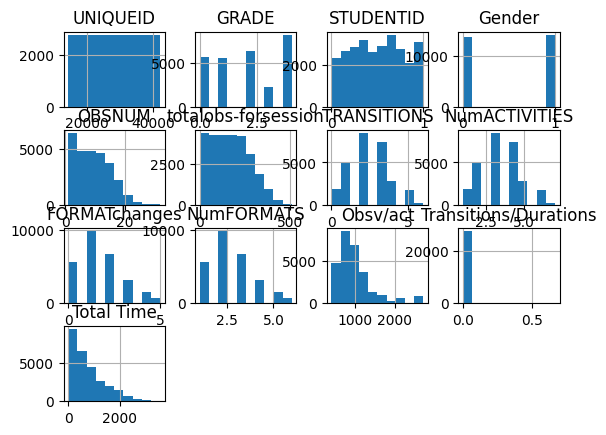

In [ ]:
a1_data.hist()
pyplot.show()

In [ ]:
a1_data.shape

(27731, 18)

In [ ]:
a1_data.dtypes

,0
UNIQUEID,int64
SCHOOL,object
Class,object
GRADE,int64
CODER,object
STUDENTID,int64
Gender,int64
OBSNUM,int64
totalobs-forsession,int64
Activity,object


In [ ]:
# verificando total de dados duplicados
duplicated = a1_data.duplicated().sum()

# verficando colunas com valores NaN
nan = a1_data.isna().any().sum()

print('valores duplicados: {}'.format(duplicated))
print('valores nulos: {}'.format(nan))

valores duplicados: 0
valores nulos: 0


In [ ]:
# one hot encoding
a1_encoded = pd.get_dummies(a1_data, columns=['SCHOOL', 'Class', 'CODER', 'Activity'])
a1_encoded

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,...,Class_T9U,Class_T9V,CODER_Y,CODER_Z,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks
0,14400,0,600865,0,1,0,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
1,14401,0,596466,0,1,1,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
2,14402,0,616590,0,1,2,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
3,14403,0,734358,1,1,3,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
4,14404,0,826308,1,1,4,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,4,979370,0,17,343,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27727,42127,4,796316,1,16,344,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27728,42128,4,890896,1,16,345,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27729,42129,4,506875,0,17,346,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# transformando ontask em uma variável numérica
a1_encoded['ONTASK'].replace(['N','Y'], [0,1], inplace=True)
a1_encoded

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,...,Class_T9U,Class_T9V,CODER_Y,CODER_Z,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks
0,14400,0,600865,0,1,0,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
1,14401,0,596466,0,1,1,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
2,14402,0,616590,0,1,2,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
3,14403,0,734358,1,1,3,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
4,14404,0,826308,1,1,4,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,4,979370,0,17,343,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27727,42127,4,796316,1,16,344,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27728,42128,4,890896,1,16,345,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27729,42129,4,506875,0,17,346,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True


Foi criada uma variável que é "transitions time per student".
Essa variável basicamente multiplica o número de transições que o professor teve em uma aula pelo tempo de cada transição. Existe uma variável total time no dataset, mas ela parece levar em consideração algum outro tipo de parâmetro. Então ter o valor final das paralições que cada aluno gerou, me parece válido.

In [85]:
# criando uma nova feature
a1_encoded['transitions time per student'] = 'NaN'
for index, row in a1_encoded.iterrows():
    r = row['TRANSITIONS'] * row['Transitions/Durations']
    a1_encoded.loc[index,'transitions time per student'] =  r
a1_encoded

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,...,Class_T9V,CODER_Y,CODER_Z,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks,transitions time per student
0,14400,0,600865,0,1,0,1,3,4,1,...,False,False,True,False,False,False,False,True,False,0.012129
1,14401,0,596466,0,1,1,1,3,4,1,...,False,False,True,False,False,False,False,True,False,0.012129
2,14402,0,616590,0,1,2,1,3,4,1,...,False,False,True,False,False,False,False,True,False,0.012129
3,14403,0,734358,1,1,3,1,3,4,1,...,False,False,True,False,False,False,False,True,False,0.012129
4,14404,0,826308,1,1,4,1,3,4,1,...,False,False,True,False,False,False,False,True,False,0.012129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,4,979370,0,17,343,1,4,5,1,...,False,False,True,False,False,False,False,False,True,0.014401
27727,42127,4,796316,1,16,344,1,4,5,1,...,False,False,True,False,False,False,False,False,True,0.014401
27728,42128,4,890896,1,16,345,1,4,5,1,...,False,False,True,False,False,False,False,False,True,0.014401
27729,42129,4,506875,0,17,346,1,4,5,1,...,False,False,True,False,False,False,False,False,True,0.014401


In [86]:
a1_encoded_copy = a1_encoded

In [92]:
a1_encoded_copy.shape

(27731, 50)

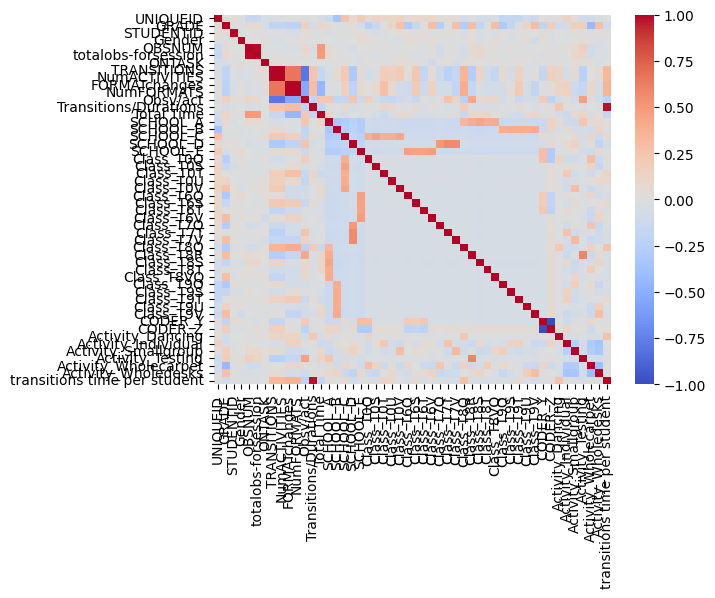

In [ ]:
# Gerando um heatmap para enteder quais variáveis estão mais correlacionadas
sns.heatmap(a1_encoded.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [ ]:
# eliminação de features com correlação entre si
corr_matrix = a1_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
print(to_drop)

#result = a1_encoded.drop(columns=to_drop)
#result.head(6)

['totalobs-forsession', 'NumACTIVITIES', 'FORMATchanges', 'NumFORMATS', 'Obsv/act', 'CODER_Z', 'transitions time per student']


In [ ]:
# y -> target (variavel dependete)
# x -> variaveis independentes
y = a1_encoded[["ONTASK"]]
x = a1_encoded[["Gender", "GRADE", "Transitions/Durations", "Activity_Dancing", "Activity_Individual", "Activity_Smallgroup", "Activity_Testing", "Activity_Wholecarpet", "Activity_Wholedesks", "TRANSITIONS", "transitions time per student"]]

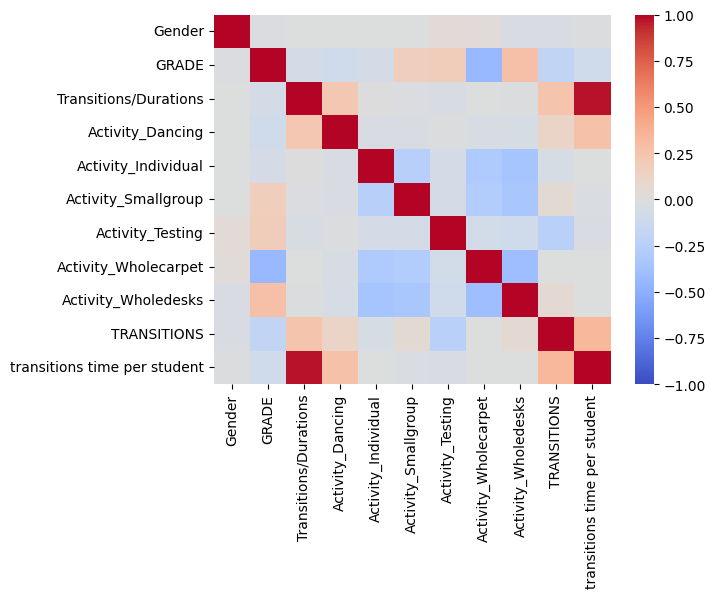

In [ ]:
# Gerando um novo heatmap apenas com as variáveis selecionadas para o treinamento
sns.heatmap(x.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [ ]:
# fazendo split do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
#validação cruzada dos modelos
salpes = 10000
features = 5
classes = 2
k = 5

kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

models = {
	'Logistic Regression': LogisticRegression(),
	'SVM': svm.SVC(kernel='sigmoid'),
	'Decision Tree': DecisionTreeClassifier()
}

scores = {}

for model_name, model in models.items():
	accuracy_scores = cross_val_score(model, x_train, y_train.values.ravel(), cv = kf, scoring = 'accuracy')
	mean_accuracy = np.mean(accuracy_scores)
	scores[model_name] = mean_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# melhor modelo
best = max(scores, key=scores.get)
best = models[best]
best

DecisionTreeClassifier()

In [ ]:
# criando um modelo de árvores de decisão usando o GridSearch
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
arv = tree.DecisionTreeClassifier()
clf = GridSearchCV(arv, parameters)
clf = clf.fit(x_train, y_train)
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [ ]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print(f'Acc dados de treino:  {train_acc}')
print(f'Acc dados de teste: {test_acc}')

Acc dados de treino:  0.6899221078949899
Acc dados de teste: 0.6758978797057551


In [ ]:
# criando um modelo de árvores de decisão usando pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('Decision Tree', DecisionTreeClassifier())])
print(f'Acc dados com pipeline: {pipe.fit(x_train, y_train).score(x_test, y_test)}')

Acc dados com pipeline: 0.6761863551132266


Os resultados obtidos foram:

Acurácia com GridSearch: 0.6899221078949899 e 0.6758978797057551, enquanto a acurácia obtida com pipeline foi de 0.6761863551132266 e anteriormente foi de 0.68. Os resultados se mostraram muito parecidos, talvez pelo conjunto de variáveis não mudado muito. Neste exemplo apenas a variável nova criada foi considerad, mas ela parece não ter feito efeito em termos de eficiência do modelo.


In [81]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# acurácia
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia: {acc:.4f}")

# precisão
precision = precision_score(y_test, y_pred_test)
print(f"Precisão: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.4f}")

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred_test)
print(f"Acurácia balanceada: {ba:.4f}")

# kappa
kappa = cohen_kappa_score(y_test, y_pred_test)
print(f"Kappa: {kappa:.4f}")

[[ 368 1948]
 [ 299 4318]]
Acurácia: 0.6759
Precisão: 0.6891
Recall: 0.9352
Acurácia balanceada: 0.5471
Kappa: 0.1144


In [82]:
print(classification_report(y_test, y_pred_test, zero_division=1))

              precision    recall  f1-score   support

           0       0.55      0.16      0.25      2316
           1       0.69      0.94      0.79      4617

    accuracy                           0.68      6933
   macro avg       0.62      0.55      0.52      6933
weighted avg       0.64      0.68      0.61      6933



In [98]:
# Aplicando o RFECV
ols = linear_model.LinearRegression()
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(a1_encoded_copy, y)
rfecv.transform(a1_encoded_copy)

print("Melhores features: ", rfecv.n_features_)

selected_indices = np.where(rfecv.support_)[0]

print("Selected feature indices: ", selected_indices)

Melhores features:  26
Selected feature indices:  [ 3  6  7  8 12 14 15 16 22 23 24 25 26 27 28 29 30 32 36 37 38 40 41 42
 44 45]


In [99]:
best_features = a1_encoded_copy.iloc[:, [3,6,7,8,12,14,15,16,22,23,24,25,26,27,28,29,30,32,36,37,38,40,41,42,44,45]]
best_features

,Gender,ONTASK,TRANSITIONS,NumACTIVITIES,Transitions/Durations,SCHOOL_A,SCHOOL_B,SCHOOL_C,Class_T0U,Class_T0V,...,Class_T7V,Class_T8R,Class_T9Q,Class_T9S,Class_T9T,Class_T9V,CODER_Y,CODER_Z,Activity_Individual,Activity_Smallgroup
0,0,1,3,4,0.004043,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,0,1,3,4,0.004043,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,0,1,3,4,0.004043,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1,1,3,4,0.004043,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1,1,3,4,0.004043,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,0,1,4,5,0.003600,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
27727,1,1,4,5,0.003600,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
27728,1,1,4,5,0.003600,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
27729,0,1,4,5,0.003600,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False


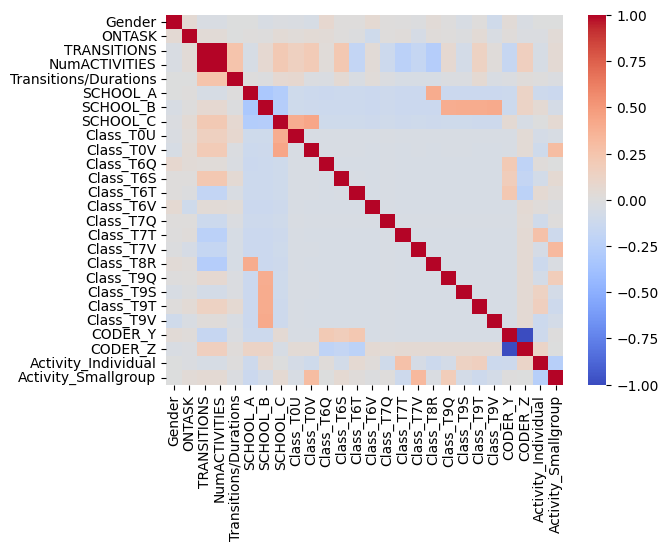

In [100]:
# Gerando um heatmap para enteder quais variáveis estão mais correlacionadas
sns.heatmap(best_features.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [101]:
# y -> target (variavel dependete)
# x -> variaveis independentes
y = best_features[["ONTASK"]]
x = best_features[["Gender", "TRANSITIONS", "NumACTIVITIES", "Transitions/Durations", "SCHOOL_A", "SCHOOL_B", "SCHOOL_C", "Class_T0U", "Class_T0V", "Class_T6Q", "Class_T6S", "Class_T6T", "Class_T6V", "Class_T7Q", "Class_T7T", "Class_T7V", "Class_T8R", "Class_T9Q", "Class_T9S", "Class_T9T", "Class_T9V", "CODER_Y", "CODER_Z", "Activity_Individual", "Activity_Smallgroup"]]

In [102]:
# fazendo split do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [103]:
# criando um modelo de árvores de decisão usando o GridSearch
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
arv = tree.DecisionTreeClassifier()
clf = GridSearchCV(arv, parameters)
clf = clf.fit(x_train, y_train)
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [104]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print(f'Acc dados de treino:  {train_acc}')
print(f'Acc dados de teste: {test_acc}')

Acc dados de treino:  0.6800653909029715
Acc dados de teste: 0.6914755517092168


In [105]:
# criando um modelo de árvores de decisão usando pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('Decision Tree', DecisionTreeClassifier())])
print(f'Acc dados com pipeline: {pipe.fit(x_train, y_train).score(x_test, y_test)}')

Acc dados com pipeline: 0.6921967402278956


In [106]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# acurácia
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia: {acc:.4f}")

# precisão
precision = precision_score(y_test, y_pred_test)
print(f"Precisão: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.4f}")

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred_test)
print(f"Acurácia balanceada: {ba:.4f}")

# kappa
kappa = cohen_kappa_score(y_test, y_pred_test)
print(f"Kappa: {kappa:.4f}")

[[ 260 1940]
 [ 199 4534]]
Acurácia: 0.6915
Precisão: 0.7003
Recall: 0.9580
Acurácia balanceada: 0.5381
Kappa: 0.0966


Os resultados finais após rodar o RFECV foram um pouco melhores.


Acc dados de treino:  0.6800653909029715

Acc dados de teste: 0.6914755517092168

Acc dados com pipeline: 0.6921967402278956